# World Data League 2021
## Notebook Template

This notebook is one of the mandatory deliverables when you submit your solution (alongside the video pitch). Its structure follows the WDL evaluation criteria and it has dedicated cells where you can add descriptions. Make sure your code is readable as it will be the only technical support the jury will have to evaluate your work.

The notebook must:

*   💻 have all the code that you want the jury to evaluate
*   🧱 follow the predefined structure
*   📄 have markdown descriptions where you find necessary
*   👀 be saved with all the output that you want the jury to see
*   🏃‍♂️ be runnable


## External links and resources
Paste here all the links to external resources that are necessary to understand and run your code. Add descriptions to make it clear how to use them during evaluation.

https://www.creativesafetysupply.com/articles/safety-colors/

https://geopandas.org/gallery/plotting_with_geoplot.html

https://www.kdnuggets.com/2017/10/7-techniques-visualize-geospatial-data.html

https://www.analyticsvidhya.com/blog/2020/06/guide-geospatial-analysis-folium-python/


https://towardsdatascience.com/visualizing-spatial-data-with-geojson-heatmaps-1fbe2063ab86

https://www.openstreetmap.org/search?query=portugal#map=6/36.234/-18.873

https://colab.research.google.com/github/shakasom/GDS/blob/master/Part1%20-%20Introduction.ipynb

Git hub link for our designed Model(for easy accessing)

https://github.com/Pravallika-Myneni/WDL-stage-2/blob/main/WDL_stage_2.ipynb

## Introduction
Describe how you framed the challenge by telling us what problem are you trying to solve and how your solution solves that problem.

We're working on resolving the identifying road segments with possible safety hazards. Since we have included all of the road segments in the heatmap, our approach will aid in defining the form of road segments. And we coloured the heat map such that the colours represented the form of the road section (Risker: Red, Safest: Green).

## Development
Start coding here! 👩‍💻

Don't hesitate to create markdown cells to include descriptions of your work where you see fit, as well as commenting your code.

We know that you know exactly where to start when it comes to crunching data and building models, but don't forget that WDL is all about social impact...so take that into consideration as well.

### **Installing the libraries required**

In [ ]:
%%time 

# Important library for many geopython libraries
!apt install gdal-bin python-gdal python3-gdal 
# Install rtree - Geopandas requirment
!apt install python3-rtree 
# Install Geopandas
!pip install git+git://github.com/geopandas/geopandas.git
# Install descartes - Geopandas requirment
!pip install descartes 
# Install Folium for Geographic data visualization
!pip install folium
# Install plotlyExpress
!pip install plotly_express

Reading package lists... Done
Building dependency tree       
Reading state information... Done
gdal-bin is already the newest version (2.2.3+dfsg-2).
python-gdal is already the newest version (2.2.3+dfsg-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  python3-numpy
Suggested packages:
  python-numpy-doc python3-nose python3-numpy-dbg
The following NEW packages will be installed:
  python3-gdal python3-numpy
0 upgraded, 2 newly installed, 0 to remove and 34 not upgraded.
Need to get 2,288 kB of archives.
After this operation, 13.2 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 python3-numpy amd64 1:1.13.3-2ubuntu1 [1,943 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 python3-gdal amd64 2.2.3+dfsg-2 [346 kB]
Fetched 2,288 kB in 1s (2,313 kB/s)
Selecting previously unselected

Modules and Libraries

In [ ]:
import pandas as pd
import numpy as np
import geopandas as gpd # To work with geopandas data
from shapely.geometry import Point # For Data visualization
import matplotlib
import matplotlib.pyplot as plt  # For data visualization
import folium                    # For data visualization
import plotly_express as px
from sklearn.cluster import KMeans # For clustering
from matplotlib.pyplot import figure  # For data visualization
from string import ascii_letters      
import seaborn as sns    # For generating correlation Matrix

Accessing Input Data

In [ ]:
# Cloning git for accessing required data
# For easy accessability we have added the data to one of our git
!git clone --recursive https://github.com/Pravallika-Myneni/WDL-stage-2.git

Cloning into 'WDL-stage-2'...
remote: Enumerating objects: 49, done.
remote: Counting objects: 100% (49/49), done.
remote: Compressing objects: 100% (44/44), done.
remote: Total 49 (delta 8), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (49/49), done.


In [ ]:
!ls WDL-stage-2/datasets/

data.md  Lisbon.geojson  m_risk_prfile.zip  porto.geojson


In [ ]:
# Unzipping the file containing datasets
!unzip WDL-stage-2/datasets/m_risk_prfile.zip

Archive:  WDL-stage-2/datasets/m_risk_prfile.zip
 extracting: m_risk_prfile.cpg       
  inflating: m_risk_prfile.dbf       
  inflating: m_risk_prfile.geojson   
  inflating: m_risk_prfile.prj       
  inflating: m_risk_prfile.shp       
  inflating: m_risk_prfile.shx       


# Exploring Different Data Files Avaliable

We read all of the files given once to see if they were all the same and found that they were all identical. When creating our model, we took the geojson file into account.

In [ ]:
geo_json_data = gpd.read_file('m_risk_prfile.geojson')
geo_json_data.columns

Index(['Link_ID', 'linkid', 'Daily_Aver', 'Average_Ve', 'Median_of_',
       'First_Quar', 'Third_Quar', 'Func_Class', 'Speed_Cat', 'geometry'],
      dtype='object')

In [ ]:
#dbf_data = gpd.read_file('m_risk_prfile.dbf')
#dbf_data.columns

In [ ]:
#shp_data = gpd.read_file('m_risk_prfile.shp')
#shp_data.columns

In [ ]:
#shx_data = gpd.read_file('m_risk_prfile.shx')
#shx_data.columns

In [ ]:
#prj_data = gpd.read_file('m_risk_prfile.prj')
#prj_data.columns
#for containing information related to a coordinate system.

In [ ]:
#cpg_data = gpd.read_file('m_risk_prfile.cpg')
#cpg_json_data.columns
#describes a set of characters for displaying text in shapefiles; helps localize maps for specific languages.

# Exploratory data analysis (EDA)

In [ ]:
# To check the type of data avaliable
# To check if there are any null values
geo_json_data.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 34678 entries, 0 to 34677
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Link_ID     34678 non-null  int64   
 1   linkid      34678 non-null  int64   
 2   Daily_Aver  34678 non-null  float64 
 3   Average_Ve  34678 non-null  float64 
 4   Median_of_  34678 non-null  float64 
 5   First_Quar  34678 non-null  float64 
 6   Third_Quar  34678 non-null  float64 
 7   Func_Class  34678 non-null  int64   
 8   Speed_Cat   34678 non-null  int64   
 9   geometry    34678 non-null  geometry
dtypes: float64(5), geometry(1), int64(4)
memory usage: 2.6 MB


In [ ]:
# statistical analysis to analyse both numeric and object series and also the DataFrame column sets of mixed data types.
geo_json_data.describe()

,Link_ID,linkid,Daily_Aver,Average_Ve,Median_of_,First_Quar,Third_Quar,Func_Class,Speed_Cat
count,3.467800e+04,3.467800e+04,34678.000000,34678.000000,34678.000000,34678.000000,34678.000000,34678.000000,34678.000000
mean,8.958206e+08,8.958206e+08,3340.417942,56.816834,56.463409,43.822041,68.091844,2.684613,4.904781
std,2.355910e+08,2.355910e+08,2725.873982,51.983670,26.240876,24.442204,30.985191,0.538658,1.520568
min,8.021682e+07,8.021682e+07,14.435864,-401.703724,1.000000,-392.500000,1.000000,1.000000,2.000000
25%,7.364832e+08,7.364832e+08,1903.398108,38.315321,38.250000,26.000000,48.000000,2.000000,4.000000
50%,9.067377e+08,9.067377e+08,2644.529317,49.966126,50.000000,38.875000,60.333333,3.000000,6.000000
75%,1.154997e+09,1.154997e+09,3897.886608,69.511585,71.000000,56.000000,85.000000,3.000000,6.000000
max,1.223731e+09,1.223731e+09,49309.806935,6357.022296,1326.250000,143.000000,2605.000000,3.000000,7.000000


In [ ]:
# Sample Data present
geo_json_data.sample(4)

,Link_ID,linkid,Daily_Aver,Average_Ve,Median_of_,First_Quar,Third_Quar,Func_Class,Speed_Cat,geometry
17310,1219835837,1219835837,2506.480061,56.438431,58.000000,47.0,65.0,3,6,"MULTILINESTRING ((-9.25009 38.94371, -9.25002 ..."
4126,724672564,724672564,1196.580814,69.847222,72.291667,62.5,83.5,2,4,"MULTILINESTRING ((-8.67943 38.57980, -8.68025 ..."
30558,1168218966,1168218966,1749.133695,57.177273,63.666667,41.0,70.5,3,6,"MULTILINESTRING ((-8.62430 41.24151, -8.62471 ..."
32846,1218889736,1218889736,6703.094167,32.494056,27.464286,18.0,35.5,3,6,"MULTILINESTRING ((-8.63526 41.12575, -8.63521 ..."


In [ ]:
# Checking how the data is distributed
print('Type of Data : {0}'.format(type(geo_json_data)))
print('Shape : {0}'.format(geo_json_data.shape))
print('Count of Unique Values in Geomerty : {0}'.format(len(geo_json_data['geometry'].unique())))
print('Count of Unique Values in linkid : {0}'.format(len(geo_json_data['linkid'].unique())))
print('Count of Unique Values in SpeedCategory : {0}'.format(len(set(geo_json_data['Speed_Cat']))))
print('Count of Unique Values in Funclass : {0}'.format(len(geo_json_data['Func_Class'].unique())))

Type of Data : <class 'geopandas.geodataframe.GeoDataFrame'>
Shape : (34678, 10)
Count of Unique Values in Geomerty : 34673
Count of Unique Values in linkid : 34678
Count of Unique Values in SpeedCategory : 6
Count of Unique Values in Funclass : 3


This represents how the speed cat is mapped based on speed limit in the dataset.

---


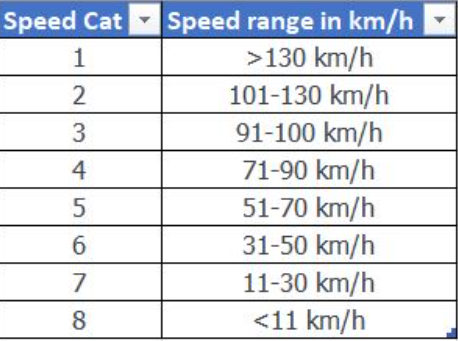


In [ ]:
#To Check if both linkid and Link_ID are same or not
len(geo_json_data['linkid'] == geo_json_data['Link_ID'])

34678

In [ ]:
#Dropping one of the columns as they both represent the same
geo_json_data = geo_json_data.drop(columns= ['Link_ID'])

# Graphical Representations

We used graphs to understand how the data can be used further and to understand what geometry field represnts.

<Figure size 1080x1080 with 0 Axes>

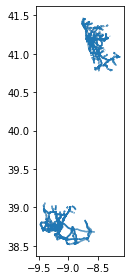

In [ ]:
# Plot overlayed maps
plt.figure(figsize= (15,15))
geo_json_data.plot(markersize=0.5)
plt.tight_layout()
#plt.savefig('overlay_map.png')
plt.show()

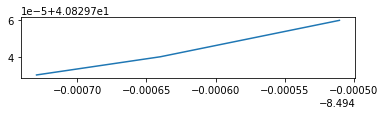

In [ ]:
# Plotting single geometry value
geo_json_data.sample(1).plot(markersize=0.5)

In [ ]:
#Porto and lisbon boundaries
porto_boundaries = gpd.read_file('https://raw.githubusercontent.com/Pravallika-Myneni/WDL-stage-2/main/datasets/porto.geojson')
lisbon_boundaries = gpd.read_file('https://raw.githubusercontent.com/Pravallika-Myneni/WDL-stage-2/main/datasets/Lisbon.geojson')

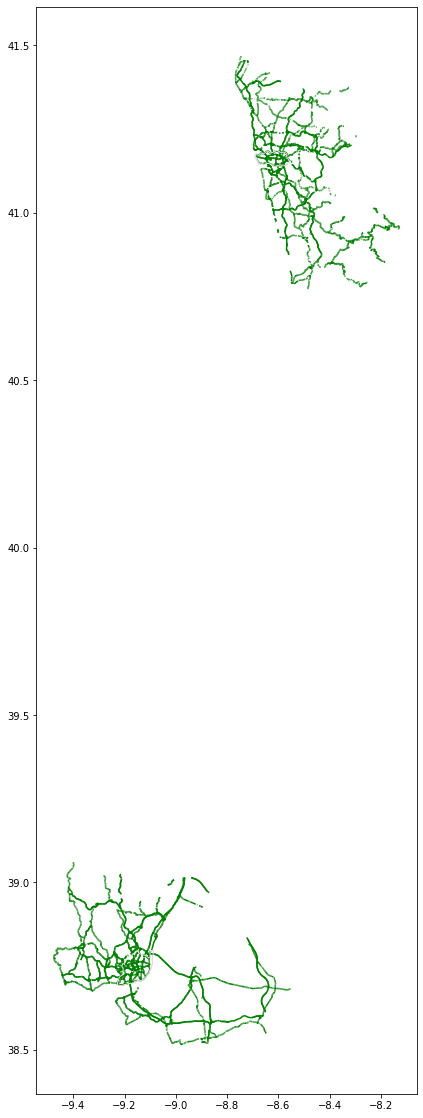

In [ ]:
# plotting graph using datavalues as well as porto and lisbon boundaries
ax = porto_boundaries.plot(figsize=(20,20), color='none', edgecolor='gainsboro', zorder=3)
lisbon_boundaries.plot(figsize=(20,20), color='none', edgecolor='gainsboro', zorder=3,ax=ax)
geo_json_data.plot(color = 'green', ax = ax)

Coordinate systems and Projections
Coordinate reference systems represent how our data as two dimensional (planar) relates to actual places on earth. It is the glue that holds the attributes to their respective locations. Geodataframes has .crs attribute that can give you the original CRS used in the data. It is easy to transform and project these coordinates. However, to perform projections, it is necessary to have the same CRS in order to carry out geographic analysis and get the right values out the analysis. The countries, cities and rivers have the same CRS. Let us check them.

In [ ]:
# Checking crs values to understand what actually geometry is
geo_json_data.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Different CRS have different measurements. For some, the coordinates are defined in decimal degrees while others are defined in meters. It is common process to reproject data from one format to another in Geographic data processing. This source is very useful in visualizing and comparing different Projections: https://map-projections.net/compare.php?p1=mercator-84&p2=robinson&sps=1

We will project our data into mercator. The Mercator projection, latitude-longitude quadrangles are stretched along the x-axis and y-axis as you move away from the equator.

In [ ]:
# Look at the geometry column: decimal degrees
geo_json_data.geometry[:5]

0    MULTILINESTRING ((-9.16402 38.77030, -9.16389 ...
1    MULTILINESTRING ((-9.16645 38.74274, -9.16638 ...
2    MULTILINESTRING ((-9.16645 38.74274, -9.16637 ...
3    MULTILINESTRING ((-9.16588 38.74370, -9.16568 ...
4    MULTILINESTRING ((-9.16472 38.74478, -9.16487 ...
Name: geometry, dtype: geometry

In [ ]:
# Project the data into Mercator Projection epsg=3395
data_projected = geo_json_data.set_crs(epsg=3395, allow_override=True)

#See the geometry column of the projected data
data_projected.geometry[:5]

0    MULTILINESTRING ((-9.164 38.770, -9.164 38.771...
1    MULTILINESTRING ((-9.166 38.743, -9.166 38.743...
2    MULTILINESTRING ((-9.166 38.743, -9.166 38.743...
3    MULTILINESTRING ((-9.166 38.744, -9.166 38.744...
4    MULTILINESTRING ((-9.165 38.745, -9.165 38.745...
Name: geometry, dtype: geometry

Understanding difference between the present data and the projected data after chaging crs value

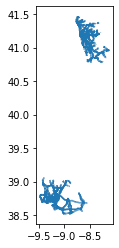

In [ ]:
# plotting graph for original data
geo_json_data.plot(markersize=0.5)

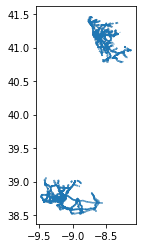

In [ ]:
# Plotting projected data with modified crs value
data_projected.plot(markersize=0.5)

Model Development

We divided the data present into two seperate dataframes one is Geo_data and the other road_data. Geo_data contains only the linkid and geometry values and road_data contains linkid,Daily_Aver,Average_Ve, Median_of_,First_Quar,Third_Quar,Func_Class,Speed_Cat values.

**Why Data Divison Required?**
For the creation of our model, we will employ clustering. Linkid and geometry are distinct values that, if used for clustering, can result in incorrect or inconsistent cluster generation.

In [ ]:
Geo_data = geo_json_data[['linkid','geometry']]
Geo_data.head()

,linkid,geometry
0,80216819,"MULTILINESTRING ((-9.16402 38.77030, -9.16389 ..."
1,80216858,"MULTILINESTRING ((-9.16645 38.74274, -9.16638 ..."
2,80216859,"MULTILINESTRING ((-9.16645 38.74274, -9.16637 ..."
3,80216860,"MULTILINESTRING ((-9.16588 38.74370, -9.16568 ..."
4,80216867,"MULTILINESTRING ((-9.16472 38.74478, -9.16487 ..."


In [ ]:
road_data = geo_json_data.drop(columns= ['geometry'])
road_data.head()

,linkid,Daily_Aver,Average_Ve,Median_of_,First_Quar,Third_Quar,Func_Class,Speed_Cat
0,80216819,6224.778569,45.208716,44.464286,28.000000,59.00,2,6
1,80216858,2236.054168,79.563308,82.750000,71.750000,93.25,2,4
2,80216859,2138.725039,65.955069,67.333333,61.000000,75.00,3,6
3,80216860,2201.335041,47.533911,44.000000,26.900000,74.00,3,6
4,80216867,2102.610278,51.375291,53.250000,45.333333,59.00,3,6


In [ ]:
X = road_data.drop(columns= ['linkid'])
X.sample(4)

,Daily_Aver,Average_Ve,Median_of_,First_Quar,Third_Quar,Func_Class,Speed_Cat
11591,16032.831528,68.913743,66.916667,58.305556,76.923611,2,4
13292,1185.427491,125.741071,122.250000,113.500000,141.750000,1,2
4558,1385.935197,54.918272,54.000000,49.750000,59.000000,2,6
27972,1033.097986,50.070833,46.200000,39.500000,61.583333,3,6


# Clustering

We used the Elbow Method to determine the optimal number of clusters that can be generated from the data present and discovered that we can form 5 clusters from the data present.

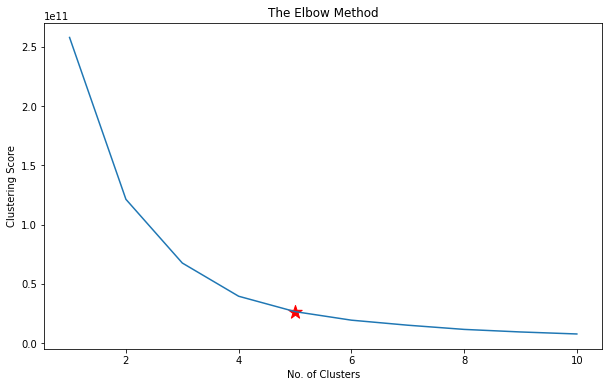

In [ ]:
clustering_score = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'random', random_state = 42)
    kmeans.fit(X)
    clustering_score.append(kmeans.inertia_) # inertia_ = Sum of squared distances of samples to their closest cluster center.
    

plt.figure(figsize=(10,6))
plt.plot(range(1, 11), clustering_score)
plt.scatter(5,clustering_score[4], s = 200, c = 'red', marker='*')
plt.title('The Elbow Method')
plt.xlabel('No. of Clusters')
plt.ylabel('Clustering Score')
plt.show()

In [ ]:
kmeans= KMeans(n_clusters = 5, random_state = 42)

# Compute k-means clustering
kmeans.fit(X)

# Compute cluster centers and predict cluster index for each sample.
pred = kmeans.predict(X)

In [ ]:
#Adding predictions to the data avaliable
road_data['cluster'] = pd.DataFrame(pred, columns=['cluster'])
road_data.sample(5)

,linkid,Daily_Aver,Average_Ve,Median_of_,First_Quar,Third_Quar,Func_Class,Speed_Cat,cluster
17749,537292613,3522.656535,49.705932,50.000000,41.666667,58.0,3,4,0
14084,1155392367,4612.486633,94.477270,94.166667,80.750000,108.0,1,2,0
18591,549791418,2448.210230,24.000000,24.000000,24.000000,24.0,3,6,4
17566,1220409169,1636.787337,53.211042,47.000000,41.000000,66.5,3,6,4
14165,1160265764,3083.452866,53.510207,57.000000,46.000000,66.0,3,6,0


Correlation matrix for identifying attributes that effect most

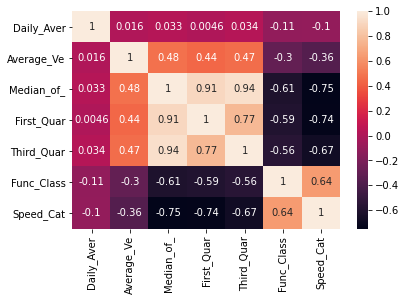

In [ ]:
# Correlation matrix for understanding the relation between the attributes present
sns.heatmap(X.corr(), annot = True)

The correlation matrix shows that none of the characteristics are strongly associated with one another.

# Analysing each Cluster

In [ ]:
# Creating 5 dataframes each containing data corresponding to each cluster
cluster_0 = road_data[road_data['cluster']==0].copy()
cluster_1 = road_data[road_data['cluster']==1].copy()
cluster_2 = road_data[road_data['cluster']==2].copy()
cluster_3 = road_data[road_data['cluster']==3].copy()
cluster_4 = road_data[road_data['cluster']==4].copy()

Analysing each cluster for identifying the attributes that helps in identifying the type of road segment

In [ ]:
cluster_0.describe()

,linkid,Daily_Aver,Average_Ve,Median_of_,First_Quar,Third_Quar,Func_Class,Speed_Cat,cluster
count,1.106400e+04,11064.000000,11064.000000,11064.000000,11064.000000,11064.000000,11064.000000,11064.000000,11064.0
mean,9.097398e+08,3820.669071,57.875017,57.506132,44.027853,69.762411,2.627892,4.765907,0.0
std,2.428032e+08,665.070185,65.863498,25.465938,25.060173,27.207569,0.587698,1.598542,0.0
min,8.021708e+07,2885.356488,-38.986610,8.000000,0.000000,9.000000,1.000000,2.000000,0.0
25%,7.374331e+08,3246.641928,38.263267,38.333333,25.000000,49.000000,2.000000,4.000000,0.0
50%,9.072881e+08,3706.870529,50.769833,51.000000,38.000000,62.000000,3.000000,6.000000,0.0
75%,1.166900e+09,4309.585340,71.555033,74.000000,57.654167,89.000000,3.000000,6.000000,0.0
max,1.223327e+09,5341.442997,6357.022296,131.000000,119.000000,456.000000,3.000000,7.000000,0.0


In [ ]:
cluster_1.describe()

,linkid,Daily_Aver,Average_Ve,Median_of_,First_Quar,Third_Quar,Func_Class,Speed_Cat,cluster
count,1.290000e+02,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.0
mean,9.476591e+08,28520.075367,43.636457,44.575739,32.187686,55.270704,2.930233,5.488372,1.0
std,2.257102e+08,6759.178583,10.350926,10.867716,11.076032,11.306900,0.284661,0.919547,0.0
min,5.431038e+08,20871.672846,26.176471,25.000000,11.833333,38.000000,1.000000,2.000000,1.0
25%,8.074947e+08,22831.021436,36.886307,38.000000,24.500000,47.500000,3.000000,5.000000,1.0
50%,8.939485e+08,26666.019098,40.904705,42.000000,31.000000,52.750000,3.000000,6.000000,1.0
75%,1.171072e+09,32018.336864,46.839286,46.750000,36.000000,58.500000,3.000000,6.000000,1.0
max,1.219613e+09,49309.806935,77.226016,81.500000,69.000000,98.000000,3.000000,6.000000,1.0


In [ ]:
cluster_2.describe()

,linkid,Daily_Aver,Average_Ve,Median_of_,First_Quar,Third_Quar,Func_Class,Speed_Cat,cluster
count,3.204000e+03,3204.000000,3204.000000,3204.000000,3204.000000,3204.000000,3204.000000,3204.000000,3204.0
mean,9.062489e+08,6867.225778,59.479609,60.511348,45.830673,72.517023,2.483770,4.371099,2.0
std,2.407844e+08,1217.825667,27.825519,23.813101,24.123115,24.143968,0.623245,1.588847,0.0
min,8.021682e+07,5342.453359,-401.703724,7.000000,2.000000,7.000000,1.000000,2.000000,2.0
25%,7.274327e+08,5836.199763,40.916461,41.000000,27.000000,51.729167,2.000000,3.000000,2.0
50%,9.076187e+08,6558.236789,58.062047,59.750000,42.000000,74.000000,3.000000,4.000000,2.0
75%,1.165838e+09,7682.586059,74.276946,77.000000,61.687500,90.785714,3.000000,6.000000,2.0
max,1.223173e+09,9898.259199,841.764173,126.000000,115.000000,135.000000,3.000000,7.000000,2.0


In [ ]:
cluster_3.describe()

,linkid,Daily_Aver,Average_Ve,Median_of_,First_Quar,Third_Quar,Func_Class,Speed_Cat,cluster
count,7.540000e+02,754.000000,754.000000,754.000000,754.000000,754.000000,754.000000,754.000000,754.0
mean,9.044088e+08,12939.734227,62.676038,59.797101,45.935575,71.025097,2.477454,4.412467,3.0
std,2.261353e+08,2547.515829,108.789471,21.029416,21.051692,22.385400,0.645874,1.490440,0.0
min,8.021782e+07,9907.872980,3.000000,3.000000,3.000000,3.000000,1.000000,2.000000,3.0
25%,7.353805e+08,10874.007553,44.795586,44.500000,30.000000,52.000000,2.000000,3.000000,3.0
50%,9.075515e+08,12239.961454,58.266124,61.000000,44.875000,75.000000,3.000000,4.000000,3.0
75%,1.162740e+09,14351.118314,71.618386,74.000000,59.000000,87.000000,3.000000,6.000000,3.0
max,1.222705e+09,20618.837417,2988.656021,115.500000,115.500000,119.000000,3.000000,7.000000,3.0


In [ ]:
cluster_4.describe()

,linkid,Daily_Aver,Average_Ve,Median_of_,First_Quar,Third_Quar,Func_Class,Speed_Cat,cluster
count,1.952700e+04,19527.000000,19527.000000,19527.000000,19527.000000,19527.000000,19527.000000,19527.000000,19527.0
mean,8.855488e+08,1952.624063,55.641188,55.158222,43.371100,66.390653,2.756081,5.086188,4.0
std,2.304307e+08,554.590927,41.851361,27.170380,24.286992,34.069710,0.472929,1.432098,0.0
min,8.021686e+07,14.435864,-276.637143,1.000000,-392.500000,1.000000,1.000000,2.000000,4.0
25%,7.364802e+08,1586.879747,37.851760,38.000000,26.000000,47.000000,3.000000,4.000000,4.0
50%,9.059712e+08,1988.838600,48.481801,48.500000,38.250000,58.125000,3.000000,6.000000,4.0
75%,1.054155e+09,2388.186676,66.646918,66.000000,54.000000,80.500000,3.000000,6.000000,4.0
max,1.223731e+09,2885.143567,3983.178775,1326.250000,143.000000,2605.000000,3.000000,7.000000,4.0


# Heat Map Generation

Steps Involved

*   Labelling each cluster based on different attributes
*   Combining Geo data and road data using linkid

*   Assigning colors based on level of danger or clashes that may happen
*   Plotting heatmap with different colors






Labelling each cluster based on different attributes: We discovered that the mean and median values of each attribute will aid in identifying the attribute that assists in labelling the road segments after analysing each cluster.

In [ ]:
avgtrafficvalues=[]
c0=cluster_0['Daily_Aver'].median()
avgtrafficvalues.append(c0)
c1=cluster_1['Daily_Aver'].median()
avgtrafficvalues.append(c1)
c2=cluster_2['Daily_Aver'].median()
avgtrafficvalues.append(c2)
c3=cluster_3['Daily_Aver'].median()
avgtrafficvalues.append(c3)
c4=cluster_4['Daily_Aver'].median()
avgtrafficvalues.append(c4)
print(avgtrafficvalues)

[3706.8705295, 26666.019098, 6558.2367885, 12239.9614535, 1988.8386]


In [ ]:
avgvehperday=[]
vc0=cluster_0['Average_Ve'].median()
avgvehperday.append(vc0)
vc1=cluster_1['Average_Ve'].median()
avgvehperday.append(vc1)
vc2=cluster_2['Average_Ve'].median()
avgvehperday.append(vc2)
vc3=cluster_3['Average_Ve'].median()
avgvehperday.append(vc3)
vc4=cluster_4['Average_Ve'].median()
avgvehperday.append(vc4)
print(avgvehperday)

[50.769833, 40.904705, 58.062047, 58.266123500000006, 48.481801]


In [ ]:
med=[]
mc0=cluster_0['Median_of_'].median()
med.append(mc0)
mc1=cluster_1['Median_of_'].median()
med.append(mc1)
mc2=cluster_2['Median_of_'].median()
med.append(mc2)
mc3=cluster_3['Median_of_'].median()
med.append(mc3)
mc4=cluster_4['Median_of_'].median()
med.append(mc4)
print(med)

[51.0, 42.0, 59.75, 61.0, 48.5]


In [ ]:
speedcat=[]
sc0=cluster_0['Speed_Cat'].median()
speedcat.append(sc0)
sc1=cluster_1['Speed_Cat'].median()
speedcat.append(sc1)
sc2=cluster_2['Speed_Cat'].median()
speedcat.append(sc2)
sc3=cluster_3['Speed_Cat'].median()
speedcat.append(sc3)
sc4=cluster_4['Speed_Cat'].median()
speedcat.append(sc4)
print(speedcat)

[6.0, 6.0, 4.0, 4.0, 6.0]


In [ ]:
funclass=[]
fc0=cluster_0['Func_Class'].median()
funclass.append(fc0)
fc1=cluster_1['Func_Class'].median()
funclass.append(fc1)
fc2=cluster_2['Func_Class'].median()
funclass.append(fc2)
fc3=cluster_3['Func_Class'].median()
funclass.append(fc3)
fc4=cluster_4['Func_Class'].median()
funclass.append(fc4)
print(funclass)

[3.0, 3.0, 3.0, 3.0, 3.0]


After checking the median values of each cluster we found that the median values are quite similar for all the clusters in case of Fun_Class, Speed_Cat, Median_of_, and Average _Ve. Only Daily_Aver is having a bit distinct values for median of each cluster. As a result, we chose Daily Aver as the useful baseline for labelling the clusters. In general, if the daily average value is greater, it indicates that there is a risk in that place.So, we labelled the level of risk accordigly.

In [ ]:
# Labelling Clusters
cluster4='Safest'          #Rank 0
cluster3='Moderately Risky' #Rank 2
cluster2='Riskier'          #Rank 3
cluster1='Highly Risky'     # Rank 4
cluster0='Safer'          #Rank 1


print("Number of safest road segments : ",cluster_4.shape[0]) # safest
print("Number of safer road segments : ",cluster_0.shape[0])  # safer
print("Number of Moderately risky road segments : ",cluster_3.shape[0]) # Moderate risk
print("Number of Riskier road segments : ",cluster_2.shape[0]) # Riskier
print("Number of Highly Risky road segments : ",cluster_1.shape[0]) #Highly risky

Number of safest road segments :  19527
Number of safer road segments :  11064
Number of Moderately risky road segments :  754
Number of Riskier road segments :  3204
Number of Highly Risky road segments :  129


Combining geo data with respective data clusters

In [ ]:
#merged_inner_0 = pd.merge(left=cluster_0, right=Geo_data, left_on='linkid', right_on='linkid')
#merged_inner_1 = pd.merge(left=cluster_1, right=Geo_data, left_on='linkid', right_on='linkid')
#merged_inner_2 = pd.merge(left=cluster_2, right=Geo_data, left_on='linkid', right_on='linkid')
#merged_inner_3 = pd.merge(left=cluster_3, right=Geo_data, left_on='linkid', right_on='linkid')
#merged_inner_4 = pd.merge(left=cluster_4, right=Geo_data, left_on='linkid', right_on='linkid')
#print(merged_inner.shape)
#print(merged_inner_0.sample(5))

In [ ]:
Geo_data.head()

,linkid,geometry
0,80216819,"MULTILINESTRING ((-9.16402 38.77030, -9.16389 ..."
1,80216858,"MULTILINESTRING ((-9.16645 38.74274, -9.16638 ..."
2,80216859,"MULTILINESTRING ((-9.16645 38.74274, -9.16637 ..."
3,80216860,"MULTILINESTRING ((-9.16588 38.74370, -9.16568 ..."
4,80216867,"MULTILINESTRING ((-9.16472 38.74478, -9.16487 ..."


In [ ]:
# Sample Cluster0 data
cluster_0.sample(4)

,linkid,Daily_Aver,Average_Ve,Median_of_,First_Quar,Third_Quar,Func_Class,Speed_Cat,cluster
13507,1084363977,3850.903211,79.770803,80.00,64.000,93.00,2,4,0
26323,912874719,3809.235411,64.614436,58.75,58.750,70.00,3,6,0
9179,901474742,3155.459155,29.606793,25.00,13.875,33.75,3,6,0
4068,722665850,3737.754910,24.495447,23.00,11.000,35.50,3,6,0


In [ ]:
# accessing the linkids for each cluster to map with the geometry field
l_0 = set(Geo_data['linkid']).intersection(set(cluster_0['linkid']))
l_1 = set(Geo_data['linkid']).intersection(set(cluster_1['linkid']))
l_2 = set(Geo_data['linkid']).intersection(set(cluster_2['linkid']))
l_3 = set(Geo_data['linkid']).intersection(set(cluster_3['linkid']))
l_4 = set(Geo_data['linkid']).intersection(set(cluster_4['linkid']))

In [ ]:
Geo_data = Geo_data.set_index('linkid')

In [ ]:
# Creating dataframes for each cluster that contains only the geometry field with linkid as keyindex
Geo_data_0 = Geo_data.loc[list(l_0)]
Geo_data_1 = Geo_data.loc[list(l_1)]
Geo_data_2 = Geo_data.loc[list(l_2)]
Geo_data_3 = Geo_data.loc[list(l_3)]
Geo_data_4 = Geo_data.loc[list(l_4)]

In [ ]:
Geo_data_0.sample(4)

,geometry
linkid,
902233365,"MULTILINESTRING ((-9.25741 38.76589, -9.25756 ..."
1165398590,"MULTILINESTRING ((-9.11706 38.78763, -9.11676 ..."
1214566395,"MULTILINESTRING ((-9.21407 38.72556, -9.21417 ..."
588725869,"MULTILINESTRING ((-8.66890 41.26896, -8.66920 ..."


In [ ]:
print("Number of safest road segments : ",Geo_data_4.shape[0]) # safest
print("Number of safer road segments : ",Geo_data_0.shape[0])  # safer
print("Number of Moderately risky road segments : ",Geo_data_3.shape[0]) # Moderate risk
print("Number of Riskier road segments : ",Geo_data_2.shape[0]) # Riskier
print("Number of Highly Risky road segments : ",Geo_data_1.shape[0]) #Highly risky

Number of safest road segments :  19527
Number of safer road segments :  11064
Number of Moderately risky road segments :  754
Number of Riskier road segments :  3204
Number of Highly Risky road segments :  129


Colour Mapping

Red: Highly Risky road segement

lightsalmon: Riskier road segement

yellow : Moderately riskier road segment

steel blue : Safer

yellowgreen : Safest

---

With the help of below information we found how the level of riskiness can be mapped with different colours.
https://www.creativesafetysupply.com/articles/safety-colors/

https://www.degruyter.com/document/doi/10.1515/geo-2018-0029/html

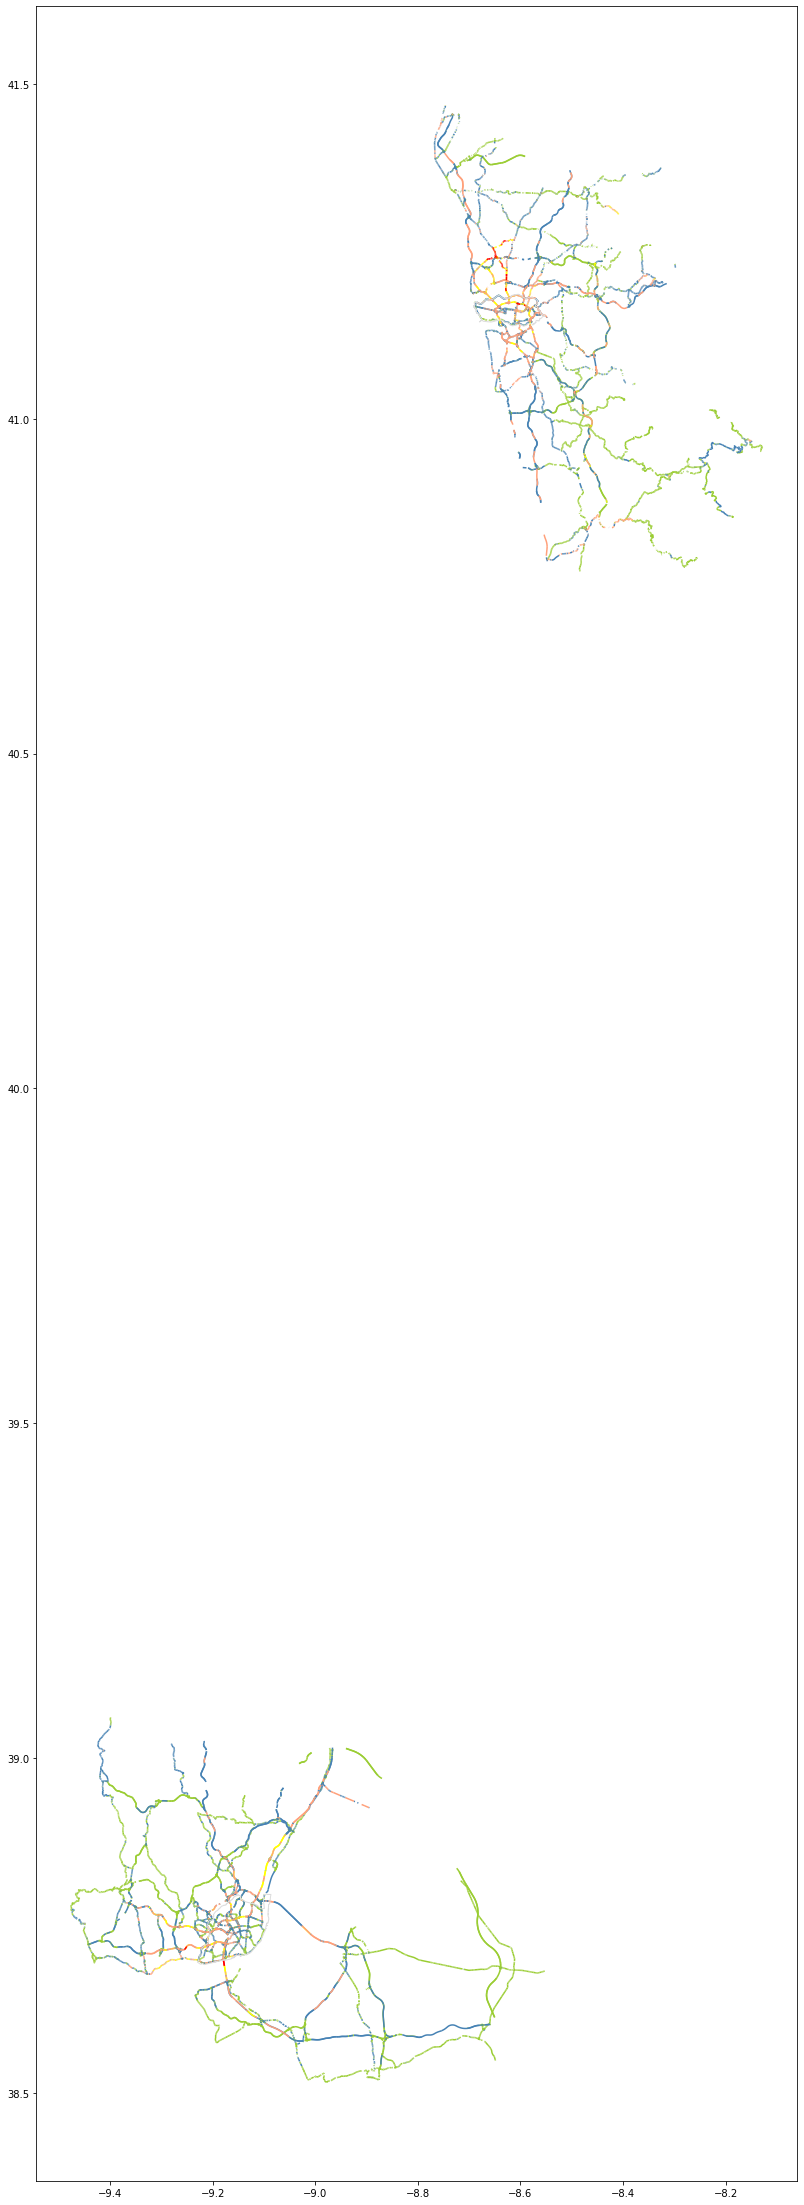

In [ ]:
ax = porto_boundaries.plot(figsize=(20,40), color='none', edgecolor='gainsboro', zorder=3)
lisbon_boundaries.plot(figsize=(40,20), color='none', edgecolor='gainsboro', zorder=3,ax=ax)
Geo_data_4.plot(color = 'yellowgreen',markersize = 0.5, ax = ax) #Safest
Geo_data_0.plot(color = 'steelblue',markersize = 0.5 ,ax = ax) # SAfer
Geo_data_3.plot(color = 'yellow',markersize = 0.5, ax = ax)   # Moderate Risk
Geo_data_2.plot(color = 'lightsalmon',markersize = 0.5, ax = ax) #Riskier
Geo_data_1.plot(color = 'Red',markersize = 0.5, ax = ax)  #Highly Risk

**Highly Risky road segments are plotted in the below heat map**

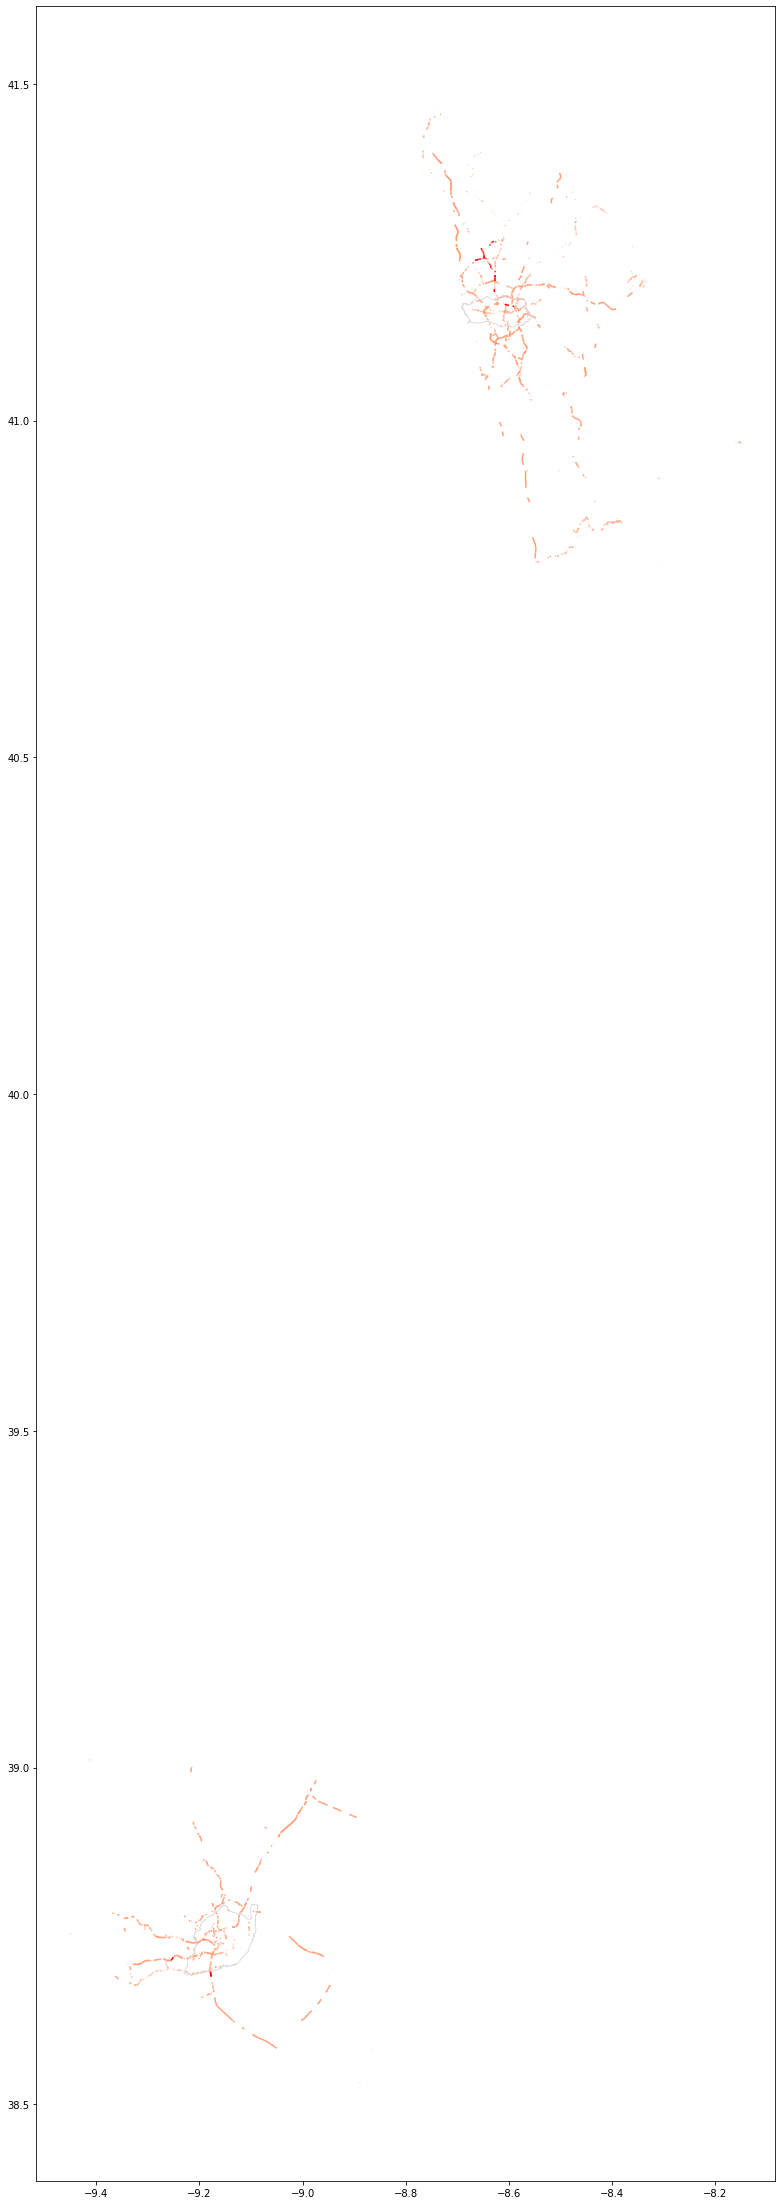

In [ ]:
ax = porto_boundaries.plot(figsize=(20,40), color='none', edgecolor='gainsboro', zorder=3)
lisbon_boundaries.plot(figsize=(40,20), color='none', edgecolor='gainsboro', zorder=3,ax=ax)
Geo_data_2.plot(color = 'lightsalmon',markersize = 3.0, ax = ax) #Riskier
Geo_data_1.plot(color = 'red',markersize = 3.0, ax = ax)  #Highly Risk

## Conclusions

### Scalability and Impact
Tell us how applicable and scalable your solution is if you were to implement it in a city. Identify possible limitations and measure the potential social impact of your solution.

***Our Solution***
By using the data from heatmap we can identify the regions that required to be taken care of, as they are highly risky. By visulaizing the data it helps to change local policies, driver behaviour and specific traffic signs to improve transportation safety.

### Future Work
Now picture the following scenario: imagine you could have access to any type of data that could help you solve this challenge even better. What would that data be and how would it improve your solution? 🚀

**Data Improvements that can be done:**

The data can be imporved by adding some of the other details like type of road segment(highway,residential area, commerical area, schoolzone, hill areas...), climatic conditions(foggy zones, swony, rainy..), Seasonal data,Road Condition(Well Maintained or not), how often accidents occur in a particular road segment, etc.

**Furure Work that can be done:**

We can also build an interactive website using this developed model by using flask which can help users in real world.

It would be more beneficial if we could access real-time data to create an application that assists users by offering accurate information about the roads that they take for a certain destination and can also recommend safer road segments that the user can take.